In [1]:
%run rs2th_functions.ipynb

In [2]:
niter = 20;

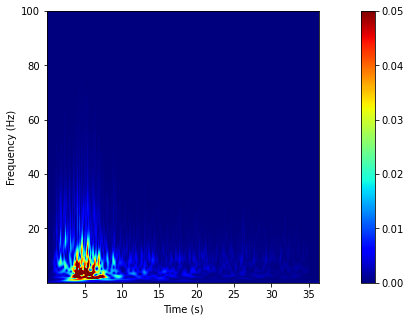

In [13]:
# Read th
dt = 0.005;
data = fileI('RSN125_FRIULI.A_A-TMZ000-1.AT2');
t,th = read_th(data,dt);
fileO(t,th,'th_original_st1_.txt');
# Plot th
#plt.figure(); plt.plot(t,th,'k-'); plt.title('Initial th');

# generate frequency table
freq,fmin,fmax,df = gen_ft(t);

# s-transform
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
stock = st.st(th, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)
asp = (extent[1]-extent[0])/(extent[3]-extent[2]);

fig1 = plt.figure(figsize=(15,5));
a1 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=0.05);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('original th');
fig1.colorbar(a1);
fig1.savefig('stock_st_original1.png', dpi=1500); 

# RVCH 
ft = np.array([1,  10, 20,  100.0]);  # frequency table
rt = np.array([1,  15, 15,  3]);  # response spectrum table
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

freq,rs_syn = srs_iso(freq,th,0.05,dt);

#plt.figure(); plt.loglog(freq,rs,label='Target'); plt.loglog(freq,rs_syn,label='Syn'); plt.title('Initial RS'); plt.legend();

In [4]:
# Interation
for k in range(niter):
    inv_stock = st.ist(stock, fmin_samples, fmax_samples);
    inv_stock[np.where(np.abs(inv_stock)==max(np.abs(inv_stock)))] /= 2;
    freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
    An = rs/rs_syn
    stock = st.st(inv_stock, fmin_samples, fmax_samples);
    for i in range(len(stock[0,:])):
        stock[:,i] *= An;

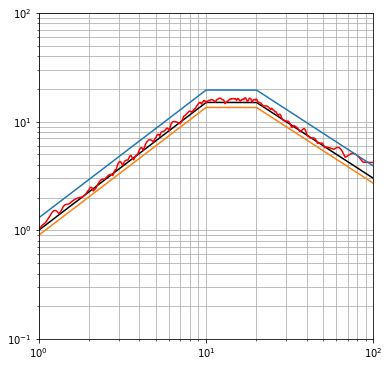

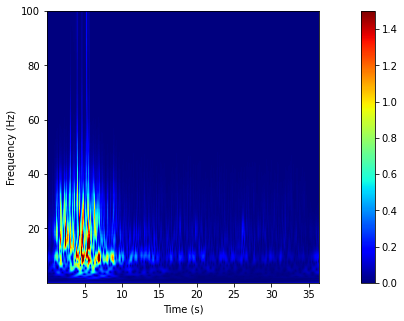

In [5]:
#  Plot RS
inv_stock *= 1.05; freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

# plot s-transform
#plt.figure(figsize=(10.5,5));
#plt.plot(t, th,'k-',lw=0.4);
#plt.xlabel('Time (s)'); plt.ylabel('Acceleration (g)');
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=1.5);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('modified th');
fig2.colorbar(a2);
plt.show()
fig2.savefig('stock_st_modified1.png', dpi=1500); 

In [6]:
fileO(freq,rs_syn,'rs_syn_st1.txt');
fileO(t,inv_stock,'th_syn_st1.txt');

In [7]:
#np.savetxt('stock_original1.txt',np.abs(stock1),fmt='%.4e');
#np.savetxt('stock_modified1.txt',np.abs(stock),fmt='%.4e');

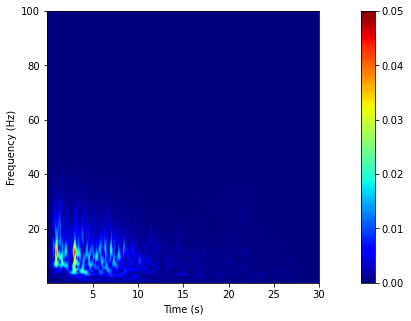

In [14]:
# Read th
dt = 0.005;
data = fileI('RSN454_MORGAN_GIL067-1.AT2');
t,th = read_th(data,dt);
fileO(t,th,'th_original_st2_.txt');
# Plot th
#plt.figure(); plt.plot(t,th,'k-'); plt.title('Initial th');

# generate frequency table
freq,fmin,fmax,df = gen_ft(t);

# s-transform
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
stock = st.st(th, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)
asp = (extent[1]-extent[0])/(extent[3]-extent[2]);

fig1 = plt.figure(figsize=(15,5));
a1 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=0.05);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('original th');
fig1.colorbar(a1);
fig1.savefig('stock_st_original2.png', dpi=1500); 

# RVCH 
ft = np.array([1,  10, 20,  100.0]);  # frequency table
rt = np.array([1,  15, 15,  3]);  # response spectrum table
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

freq,rs_syn = srs_iso(freq,th,0.05,dt);

#plt.figure(); plt.loglog(freq,rs,label='Target'); plt.loglog(freq,rs_syn,label='Syn'); plt.title('Initial RS'); plt.legend();

In [9]:
# Interation
for k in range(niter):
    inv_stock = st.ist(stock, fmin_samples, fmax_samples);
    inv_stock[np.where(np.abs(inv_stock)==max(np.abs(inv_stock)))] /= 2;
    freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
    An = rs/rs_syn
    stock = st.st(inv_stock, fmin_samples, fmax_samples);
    for i in range(len(stock[0,:])):
        stock[:,i] *= An;

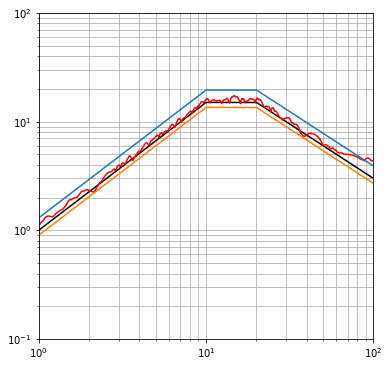

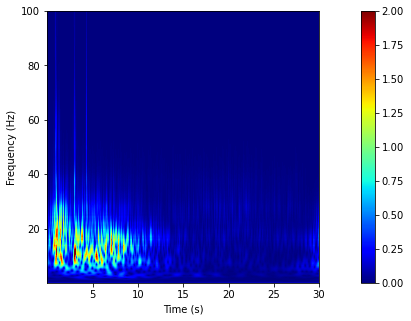

In [10]:
#  Plot RS
inv_stock *= 1.05; freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

# plot s-transform
#plt.figure(figsize=(10.5,5));
#plt.plot(t, th,'k-',lw=0.4);
#plt.xlabel('Time (s)'); plt.ylabel('Acceleration (g)');
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=asp,cmap='jet',vmin=0,vmax=2);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); #plt.title('modified th');
fig2.colorbar(a2);
plt.show()
fig2.savefig('stock_st_modified2.png', dpi=1500); 

In [11]:
fileO(freq,rs_syn,'rs_syn_st2.txt');
fileO(t,inv_stock,'th_syn_st2.txt');

In [12]:
#np.savetxt('stock_original2.txt',np.abs(stock1),fmt='%.4e');
#np.savetxt('stock_modified2.txt',np.abs(stock),fmt='%.4e');